<a href="https://colab.research.google.com/github/karla-sm/M-dulo-II-Diplomado-TEyMD/blob/main/Monty_Hall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El problema de Monty Hall

Es un famoso dilema de probabilidad basado en un concurso de televisión, y es un gran ejemplo de cómo las intuiciones humanas pueden ser engañosas en contextos probabilísticos.

## Planteamiento del problema:

Tienes tres puertas enfrente de ti. Detrás de una de ellas hay un coche (el premio), y detrás de las otras dos hay cabras (premios no deseados).

Tu elección inicial: Eliges una puerta, pero no la abres aún.

Monty Hall (el presentador, que sabe qué hay detrás de cada puerta) abre una de las otras dos puertas, revelando una cabra.

Segunda oportunidad: Ahora Monty te da la opción de cambiar de puerta (de tu elección original a la otra puerta que queda cerrada) o quedarte con tu elección inicial.

**¿Qué deberías hacer? ¿Cambiar de puerta o quedarte con tu elección original?**

* Respuesta correcta: Deberías cambiar de puerta.
* Explicación: Inicialmente, al elegir una puerta, tienes una probabilidad de $1/3$ de haber elegido el coche y una probabilidad de $2/3$ de haber elegido una cabra.

Cuando Monty abre una puerta revelando una cabra, no cambia estas probabilidades. Al principio tenías un 2/3 de probabilidades de haber elegido mal, y Monty, al mostrar una cabra, te está ayudando a confirmar que el coche probablemente está detrás de la otra puerta.

Si elegiste mal inicialmente (lo cual sucede en el 66.67% de los casos), Monty te da la oportunidad de corregir tu elección cambiando a la puerta correcta.

Si elegiste correctamente desde el principio (probabilidad del 33.33%), entonces cambiar haría que perdieras.

Por lo tanto, cambiar de puerta te da una probabilidad de ganar de $2/3$, mientras que quedarte con tu elección original te deja con solo una probabilidad de ganar de $1/3$.

**Ejemplo:**

* Puertas: [1, 2, 3]
* El coche está detrás de la puerta 2.
* Si eliges la puerta 1 (probabilidad $1/3$), Monty abre la puerta 3, que tiene una cabra.
* Si cambias a la puerta 2, ganas el coche (probabilidad $2/3$).

## Implementación en Python

El siguiente código simula el famoso problema de Monty Hall en tres escenarios distintos:

* Mantener la elección inicial (no cambiar de puerta).
* Cambiar siempre de puerta.
* Elegir de manera aleatoria entre mantener o cambiar.

1.- Generar el juego
La función generate_game(n) crea un conjunto de juegos. Cada juego tiene 3 puertas, una de ellas con un premio (el coche) y las otras dos con una cabra.

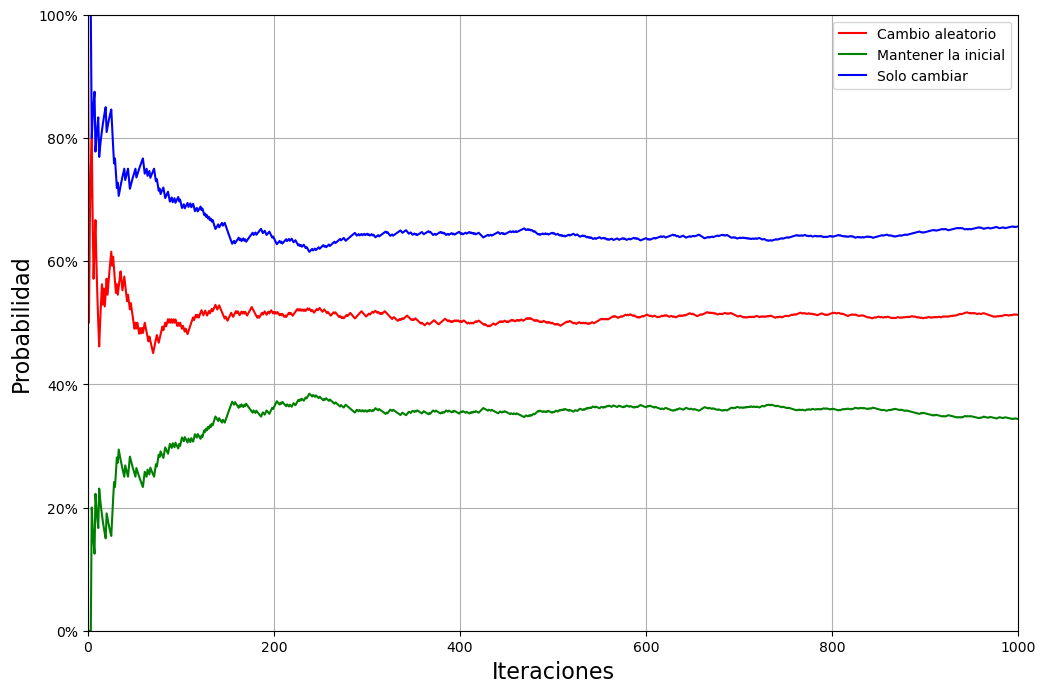

In [ ]:
from random import randint
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Esta función generará rondas aleatorias para nuestro juego. Cada ronda consta de 3 puertas. Solo una de las puertas es correcta, las otras dos son incorrectas.
# Esta función genera un conjunto de n juegos, cada uno con tres puertas, y solo una contiene el coche.

def generate_game(n: int):
    game = []

    for _ in range(n):
        doors = [False] * 3 # Inicializa 3 puertas como "falsas", indicando que no tienen el premio.
        winner = randint(0, 2) # Escoge aleatoriamente cuál puerta tiene el coche (premio).
        doors[winner] = True  # La puerta seleccionada se marca como True (es la puerta ganadora).
        game.append(doors) # Añade este set de puertas al juego.

    return game


# Esta es una función auxiliar que toma una lista de 3 puertas, examina la segunda y la tercera puerta y luego abre la que tiene una cabra (es decir, la puerta equivocada).
#Esto simula un host con conocimiento de lo que hay detrás de las puertas.
def reveal_goat(doors):
    # Get from doors 2 and 3 the one which contains goat.
    for i in range(1, 3): # Revisa solo las puertas 2 y 3, porque la puerta 1 es la que elige inicialmente el jugador.
        if doors[i] == False: # Si la puerta no contiene el coche.
            return i  # Devuelve el índice de la puerta con cabra.


# ***Simular una elección aleatoria**
#
# Simular una situación en la que el jugador elige aleatoriamente si desea mantener su elección inicial o cambiarla.

def simulate_random_choice(game: list): #El jugador decide al azar si cambia o no después de que Monty revele una cabra.
    wins = 0
    attempts = 0

    history = []

    for doors in game:
        attempts += 1

        #Monty revela una cabra.
        goat = reveal_goat(doors)

        # El jugador decide aleatoriamente si cambiar o no.
        new_choice = randint(0, 1)
        final_choice = 0 if new_choice == 0 else 2 if goat == 1 else 1 # Calcula la nueva elección

        if (doors[final_choice] == True): #Si la elección es correcta, suma un win
            wins += 1

        history.append(wins / attempts) # Añade el ratio de victorias hasta el momento.

    return wins, history


# **Simular elección inicial**
#
# Simular una situación en la que el jugador *solo* conserva su elección inicial y nunca cambia

def simulate_keep_choice(game: list): #El jugador nunca cambia de puerta.
    wins = 0
    attempts = 0
    history = []

    for doors in game:
        attempts += 1

        # User does not switch game.
        if (doors[0] == True):  # Si la primera puerta (la inicial) tiene el coche, suma un win.
            wins += 1

        history.append(wins / attempts)  # Registra el ratio de victorias.

    return wins, history


# **Simular elección de cambio**
#
# Simular una situación en la que el jugador cambia su elección cada vez.

# El jugador cambia de puerta siempre después de que Monty revele una cabra.

def simulate_switch_choice(game: list):
    wins = 0
    attempts = 0
    history = []

    for doors in game:
        attempts += 1

        # Monty revela una cabra.
        goat = reveal_goat(doors)

        # Player switches his doors (here he chooses the non-opened doors).
        new_choice = 1 if goat == 2 else 2 # El jugador cambia a la otra puerta no abierta.

        if (doors[new_choice] == True): # Si la nueva elección es correcta, suma un win.
            wins += 1

        history.append(wins / attempts) # Registra el ratio de victorias.


    return wins, history


# Ahora comienza el cálculo, que genera $n$ juegos aleatorios para la simulación.

# El código genera un conjunto de 1000 juegos y ejecuta las tres simulaciones:
game = generate_game(1000)


# Ejecute las tres simulaciones definidas anteriormente para el juego generado.

wins_random, history_random = simulate_random_choice(game)
wins_keep, history_keep = simulate_keep_choice(game)
wins_switch, history_switch = simulate_switch_choice(game)


# Y por último, crea un gráfico para que podamos ver el resultado.
plt.figure(figsize=(12,8))
plt.plot(history_random, 'r', label="Cambio aleatorio")
plt.plot(history_keep, 'g', label="Mantener la inicial")
plt.plot(history_switch, 'b', label="Solo cambiar")
plt.legend(loc='upper right')
plt.ylim(0, 1.0)
plt.xlim(0, 1000)
plt.ylabel("Probabilidad", fontsize=16)
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
plt.xlabel("Iteraciones", fontsize=16)
plt.grid(True)
plt.show()

Se visualiza cómo cambian las probabilidades de éxito para las dos estrategias principales: mantener la elección inicial y cambiar de puerta.